<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Autoregressive%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

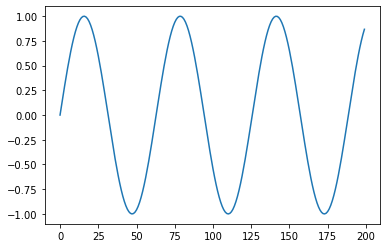

In [2]:
# Make the original data
series = np.sin(0.1 * np.arange(200))

plt.plot(series)
plt.show()

In [4]:
# Build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 52ms/step - loss: 1.5581 - val_loss: 0.5331
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.8026 - val_loss: 0.9773
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.7047 - val_loss: 0.3261
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1972 - val_loss: 0.2332
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.3207 - val_loss: 0.1988
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1462 - val_loss: 0.0150
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0309 - val_loss: 0.0636
Epoch 8/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0911 - val_loss: 0.0436
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0334 - val_loss: 0.0136
Epoch 10/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0558
Epoch 11/80
3/3 [============

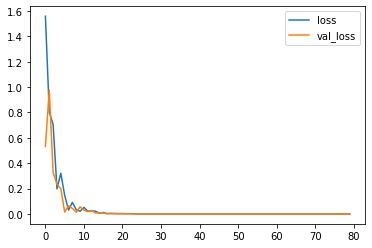

In [7]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

In [8]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array
  
  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

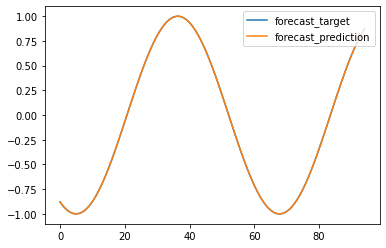

In [10]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()